# Excercise2

In [2]:
def C_to_F(C:int):
    return C*(9/5)+32  # celcius to farenheigh
    

In [3]:
C=20
C_to_F(C)

68.0

# AI for O&g USING PYTHON
## Stereonets
refrence: https://github.com/ICWallis/fractoolbox

In [10]:
# !pip install mplstereonet

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplstereonet as mpls
%matplotlib inline

In [32]:
# define strike and dip of a fault
STRIKE=45
DIP=60

Text(0.5, 1.1, 'my fault: 045/65E')

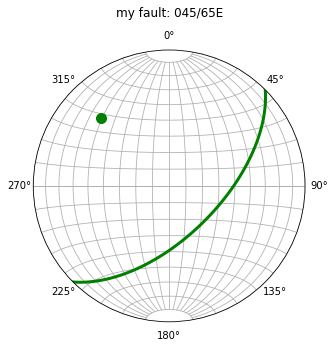

In [33]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_area_stereonet")

# default formatting - ax.plane(strike,dip)
ax.plane(STRIKE, DIP, "-", color="g", linewidth=3)   # plot the circle
ax.pole(STRIKE, DIP, "o", color="g", markersize=10)  # plot the ple
ax.grid()
ax.set_title("my fault: 045/65E", y=1.1)  # y parameter provides a sapce between the fig and the title

Text(0.5, 1.1, 'my fault equal angle: 045/65E')

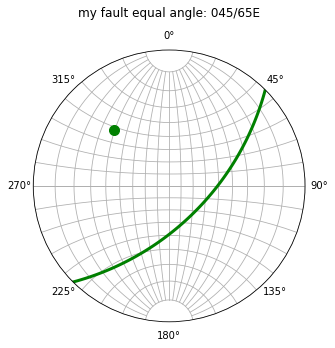

In [34]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_angle_stereonet")

# default formatting - ax.plane(strike,dip)
ax.plane(STRIKE, DIP, "-", color="g", linewidth=3)   # plot the circle
ax.pole(STRIKE, DIP, "o", color="g", markersize=10)  # plot the ple
ax.grid()
ax.set_title("my fault equal angle: 045/65E", y=1.1)  # y parameter provides a sapce between the fig and the title

In [40]:
dipazs=[0,90,180,300]
dips=[5,20,40,60]

df=pd.DataFrame(list(zip(dipazs,dips)), columns=["Azm","dips"])
df

,Azm,dips
0,0,5
1,90,20
2,180,40
3,300,60


In [46]:
df.loc[:1,]

,Azm,dips
0,0,5
1,90,20


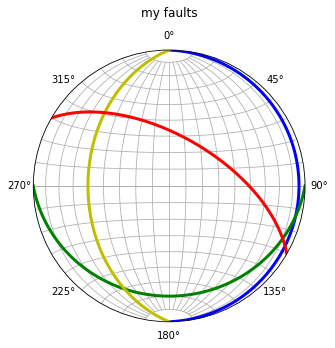

In [64]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_area_stereonet")

# default formatting - ax.plane(strike,dip)
ax.grid()
ax.set_title("my faults", y=1.1)  # y parameter provides a sapce between the fig and the title
COLORS = ["b","g","y","r"]
for i in range(df.shape[0]):
    ax.plane(df.loc[i,"Azm"],df.loc[i,"dips"], "-", color=COLORS[i], linewidth=3)
plt.show()

# Decline Curve Analysis(DCA)

* exponential
* harmonic
* hyperbolic

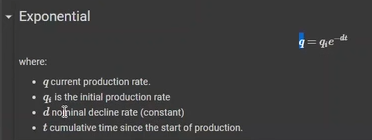
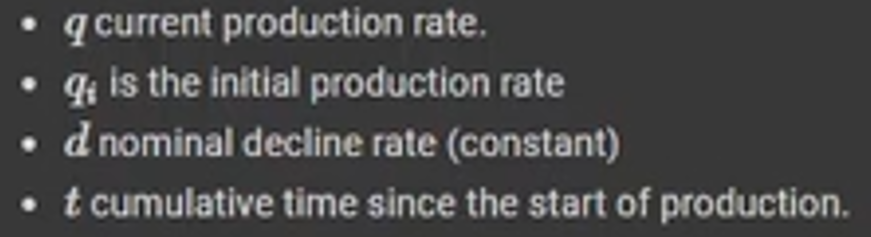

In [69]:
def ExponentialDecline(t, qi,di):
    return qi*np.exp(-di*t)

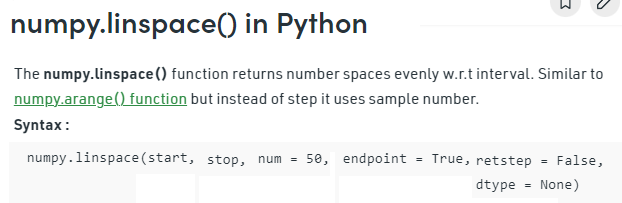

In [67]:
# create tiem series
t = np.linspace(1,365,365)
print(type(t), len(t))

<class 'numpy.ndarray'> 365


In [74]:
qi=250  # starting production
di=0.01 # declination rate

prodExp = ExponentialDecline(t,qi,di)
len(prodExp)

365

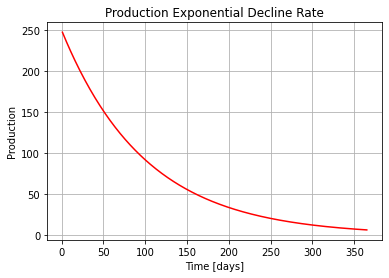

In [73]:
plt.plot(t,prodExp, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Exponential Decline Rate")
plt.grid()

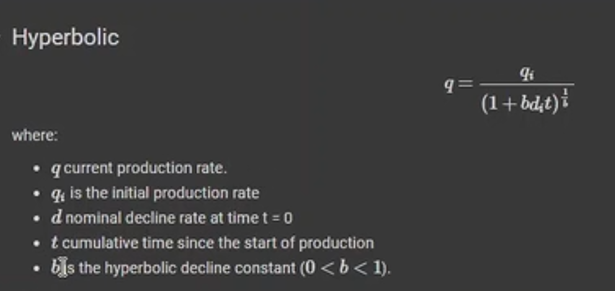

In [75]:
# Hyperbolic Decline production rate
def hyperbolicDecline(t,qi,b,di):
    return qi/((1+b*di*t)**(1/b))

In [77]:
qi=250  # starting production
di=0.01 # declination rate
b=0.5

prodHyp = hyperbolicDecline(t,qi,b,di)
len(prodHyp)

365

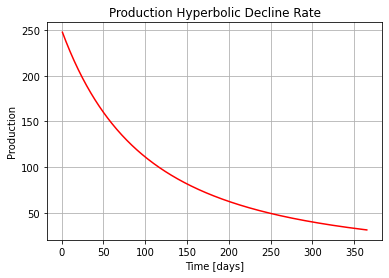

In [78]:
plt.plot(t,prodHyp, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Hyperbolic Decline Rate")
plt.grid()

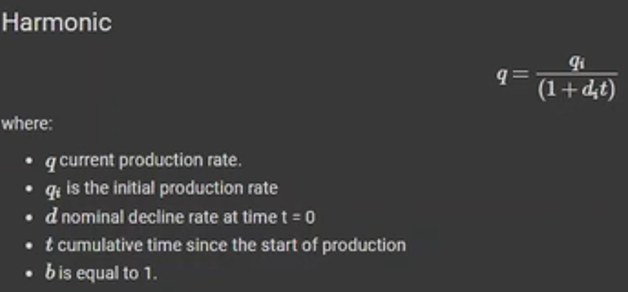

In [82]:
# Harmonic Decline production rate
def harmonicDecline(t,qi,di):
    return qi/((1+di*t))

In [84]:
qi=250  # starting production
di=0.01 # declination rate
b=1

prodHarm = harmonicDecline(t,qi,di)
len(prodHarm)

365

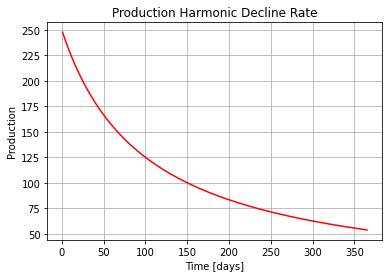

In [85]:
plt.plot(t,prodHarm, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Harmonic Decline Rate")
plt.grid()

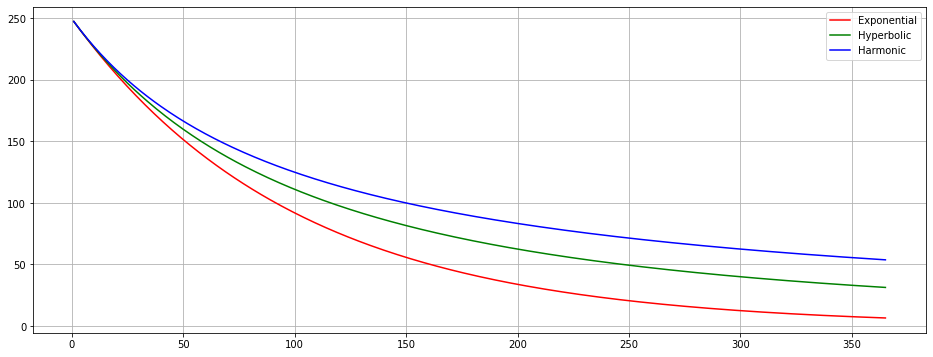

In [89]:
plt.figure(figsize=(16,6))
plt.plot(t,prodExp, c="red", label="Exponential")
plt.plot(t,prodHyp, c="green", label="Hyperbolic")
plt.plot(t,prodHarm, c="blue", label="Harmonic")
plt.legend()
plt.grid()

In [101]:
# create a data range

import datetime as dt
import random

starting_date = dt.datetime.strptime("2016-03-31 00:00:00", "%Y-%m-%d %H:%M:%S")
k=30
dates = pd.date_range(starting_date, periods=k, freq="M")
dates

DatetimeIndex(['2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='M')

In [182]:
well_rate = [248,434,383,400,322,225,208,168,145,150,133,112,114,103,137,204,186,153,156,145,142,144,130,118,129,119,120,115,110,110]
len(well_rate)

30

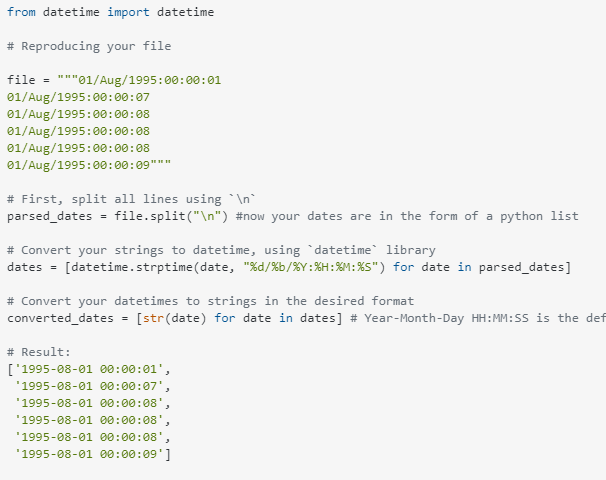

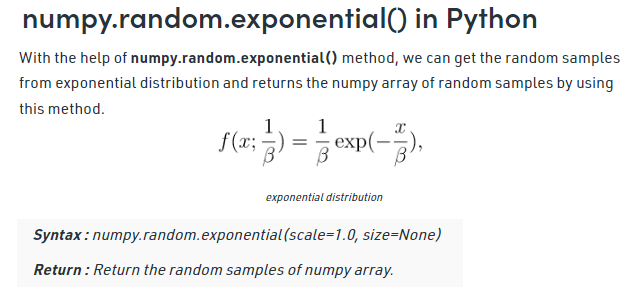

In [183]:
min_time = min(dates)
print(type(min_time))
time =  [(x-min_time).days for x in dates]  # extract the day values for the diff
print(len(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
30


In [184]:
t = np.linspace(0,max(time),len(time))
t

array([  0.        ,  30.44827586,  60.89655172,  91.34482759,
       121.79310345, 152.24137931, 182.68965517, 213.13793103,
       243.5862069 , 274.03448276, 304.48275862, 334.93103448,
       365.37931034, 395.82758621, 426.27586207, 456.72413793,
       487.17241379, 517.62068966, 548.06896552, 578.51724138,
       608.96551724, 639.4137931 , 669.86206897, 700.31034483,
       730.75862069, 761.20689655, 791.65517241, 822.10344828,
       852.55172414, 883.        ])

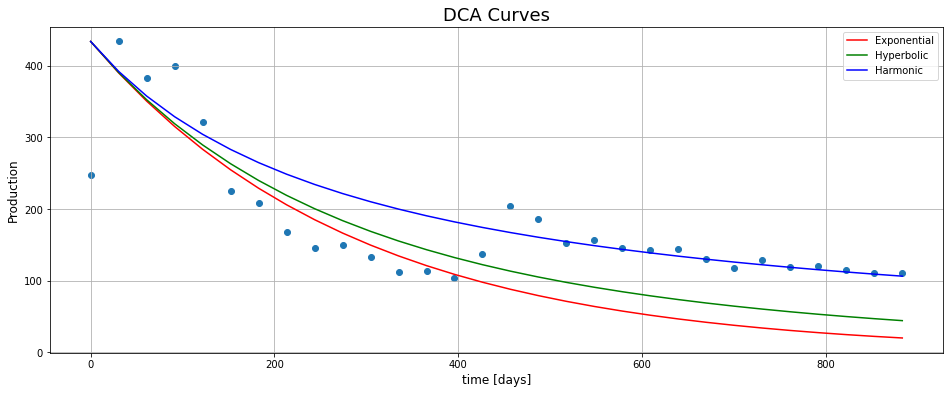

In [195]:
qi=max(well_rate)  # starting production
di=0.0035 # declination rate
b=0.25

prodExp = ExponentialDecline(t,qi,di)
prodHyp = hyperbolicDecline(t,qi,b,di)
prodHarm = harmonicDecline(t,qi,di)


plt.figure(figsize=(16,6))
plt.scatter(t,well_rate)
plt.plot(t,prodExp, c="red", label="Exponential")
plt.plot(t,prodHyp, c="green", label="Hyperbolic")
plt.plot(t,prodHarm, c="blue", label="Harmonic")
plt.xlabel("time [days]", fontsize=12)
plt.ylabel("Production", fontsize=12)
plt.title("DCA Curves", fontsize=18)
plt.legend()
plt.grid()

# EXCERCISE 2

In [198]:
file_path = "D:\\lh_data\\geophysics\\F02-1_logs.las"
file_path

'D:\\lh_data\\geophysics\\F02-1_logs.las'

In [201]:
# loading LAS as numpy array
data = np.loadtxt(file, skiprows=35)
data

array([[ 4.80000000e+01, -9.99250000e+02,  5.24048500e+02, ...,
         3.82025700e+06, -4.55695600e+02, -9.99250000e+02],
       [ 4.81500000e+01, -9.99250000e+02,  5.24041000e+02, ...,
         3.82031175e+06, -4.55695600e+02, -9.99250000e+02],
       [ 4.83000000e+01, -9.99250000e+02,  5.24033600e+02, ...,
         3.82036625e+06, -4.55695600e+02, -9.99250000e+02],
       ...,
       [ 1.49955000e+03,  1.86164970e+03,  5.37190200e+02, ...,
         3.46552400e+06, -2.39115938e+05, -9.99250000e+02],
       [ 1.49970010e+03,  1.88039780e+03,  5.37263000e+02, ...,
         3.49995775e+06, -2.39115938e+05, -9.99250000e+02],
       [ 1.49985010e+03,  1.85633500e+03,  5.37383100e+02, ...,
         3.45440400e+06, -2.12640703e+05, -9.99250000e+02]])

In [200]:
data.shape

(9680, 7)

In [207]:
data[data==-999.25]=np.nan  # assigns a value to every NULL VALUE

In [208]:
columns = []
df =pd.DataFrame(data,columns=columns)
df

,DEPTH,RHOB,DT,GR,AI,AI_rel,PHIE
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN


Text(0.5, 1.0, 'GR & DEPTH')

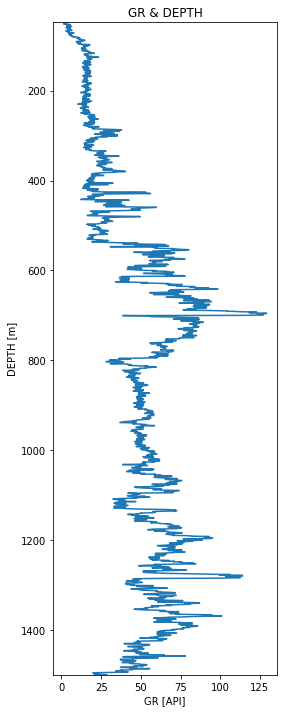

In [213]:
plt.figure(figsize=(4,12))
plt.plot(df.GR, df.DEPTH)
plt.ylim(max(df.DEPTH), min(df.DEPTH))  # changing the orientation of the y axis
plt.xlabel("GR [API]")
plt.ylabel("DEPTH [m]")
plt.title("GR & DEPTH")

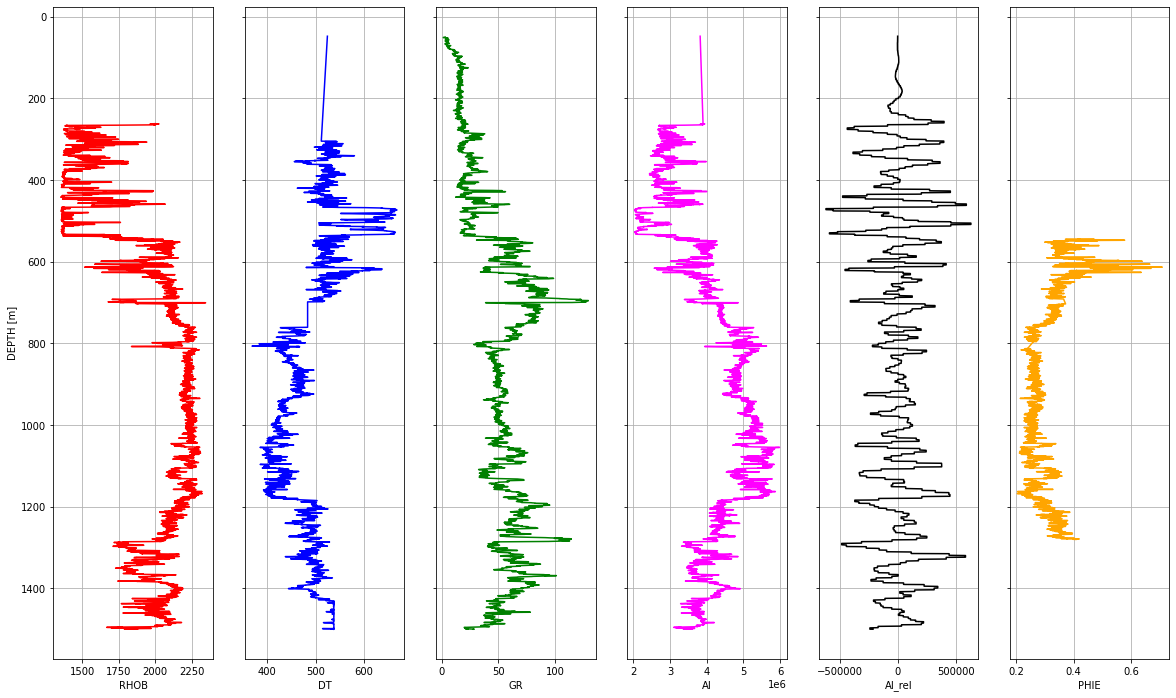

In [237]:
# SUBPLOTS

fig, ax = plt.subplots(1,6, figsize=(20,12), sharey=True)  # all the axis share the same y scale/orientation
ax[0].plot(df.RHOB, df.DEPTH, color="r")
ax[0].invert_yaxis()                                       # yaxis inverted
ax[0].set_xlabel("RHOB")
ax[0].set_ylabel("DEPTH [m]")
ax[1].plot(df.DT, df.DEPTH, color="b")
ax[1].set_xlabel("DT")
ax[2].plot(df.GR, df.DEPTH, color="g")
ax[2].set_xlabel("GR")
ax[3].plot(df.AI, df.DEPTH, color="magenta")
ax[3].set_xlabel("AI")
ax[4].plot(df.AI_rel, df.DEPTH, color="black")
ax[4].set_xlabel("AI_rel")
ax[5].plot(df.PHIE, df.DEPTH, color="orange")
ax[5].set_xlabel("PHIE")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()


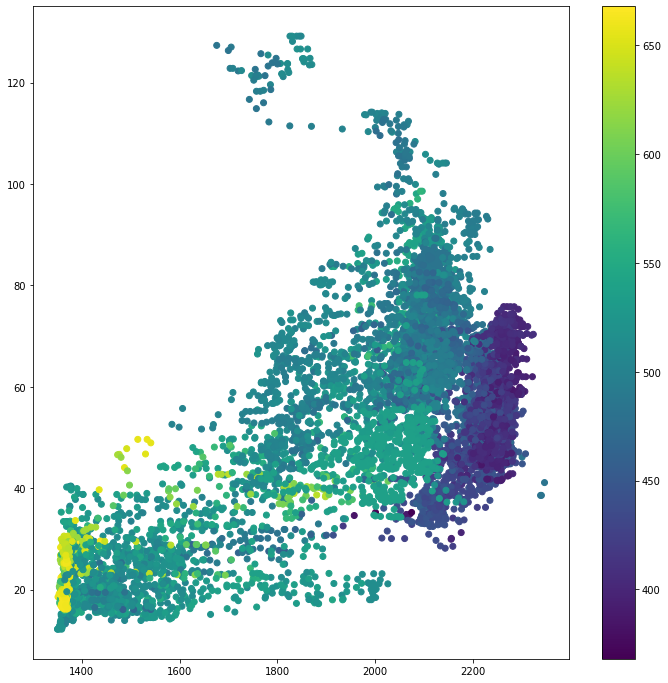

In [242]:
plt.figure(figsize=(12,12))
plt.scatter(df.RHOB,df.GR,c=df.DT)
plt.colorbar()

# SEISMIC

In [243]:
! pip install segyio

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [244]:
import segyio

In [245]:
file_path = "D:\\lh_data\\geophysics\\Penobscot_0-1000ms.sgy"
file_path

'D:\\lh_data\\geophysics\\Penobscot_0-1000ms.sgy'

In [248]:
with segyio.open(file_path) as f:
    data = segyio.cube(f)
print(type(data), data.shape, data.ndim)

<class 'numpy.ndarray'> (601, 481, 251) 3


In [249]:
print("INLINES:", data.shape[0])
print("XLINES:", data.shape[1])
print("SLICES:", data.shape[2])

INLINES: 601
XLINES: 481
SLICES: 251


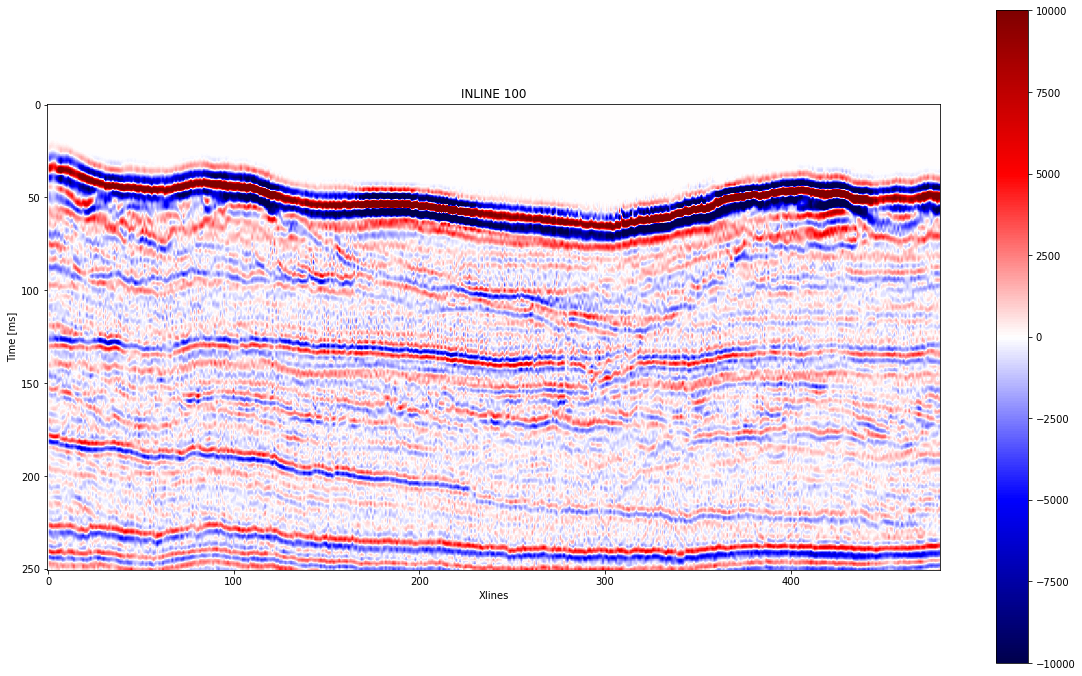

In [258]:
INLINE=100

plt.figure(figsize=(20,12)) 
plt.imshow(data[INLINE, :, :].T, cmap="seismic", vmax=10000, vmin=-10000)  # vmin, vmax allows changing the intensity of the image
plt.ylabel("Time [ms]")
plt.xlabel("Xlines")
plt.title(f"INLINE {INLINE}")

plt.colorbar()

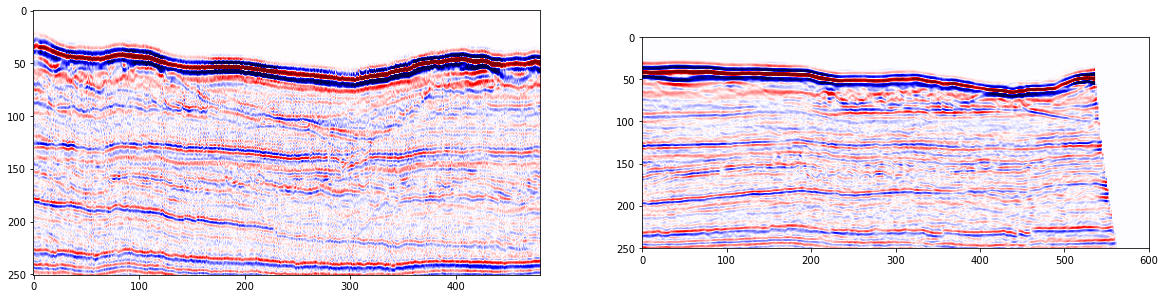

In [263]:
INLINE=100
XLINE=100
SLICE=100


plt.figure(figsize=(20,20)) 
# inlines
plt.subplot(1,2,1)
plt.imshow(data[INLINE, :, :].T, cmap="seismic", vmax=10000, vmin=-10000)
# xlines
plt.subplot(1,2,2)
plt.imshow(data[:, XLINE, :].T, cmap="seismic", vmax=10000, vmin=-10000)


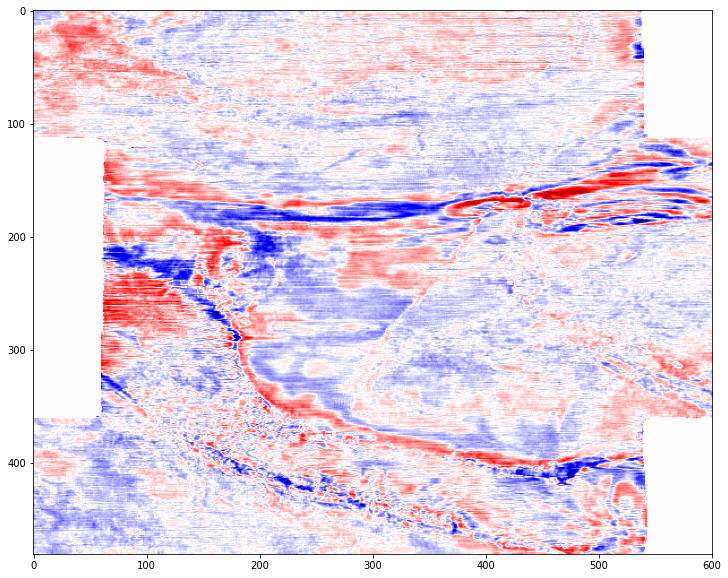

In [268]:
plt.figure(figsize=(15,10)) 
# slices
plt.imshow(data[:, :, SLICE].T, cmap="seismic", vmax=10000, vmin=-10000)

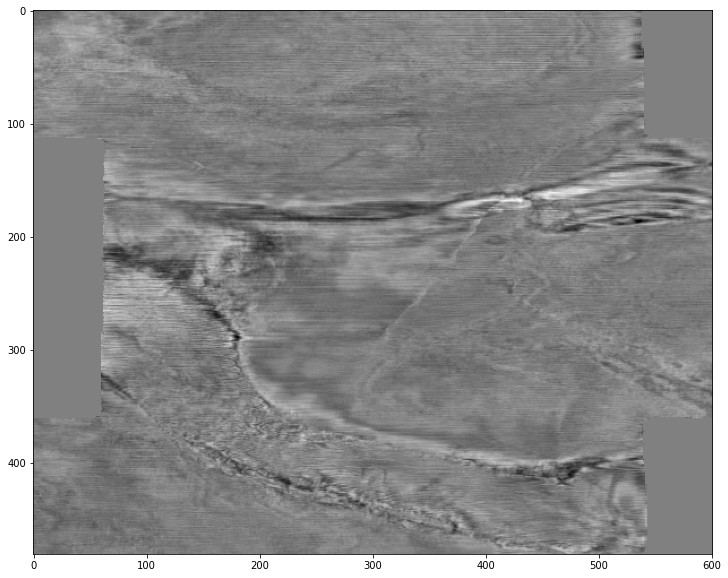

In [270]:
plt.figure(figsize=(15,10)) 
# slices
plt.imshow(data[:, :, SLICE].T, cmap="gray", vmax=10000, vmin=-10000)

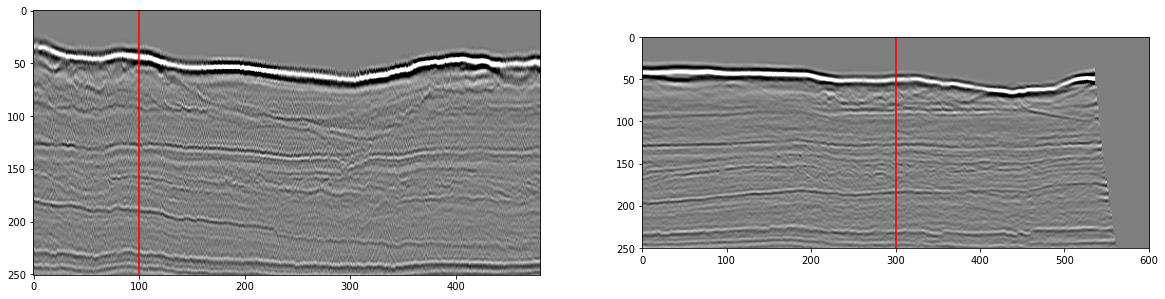

In [272]:
INLINE=100
XLINE=100
SLICE=100


plt.figure(figsize=(20,20)) 

# inlines
plt.subplot(1,2,1)
plt.axvline(x=100, c="r")
plt.imshow(data[INLINE, :, :].T, cmap="gray", vmax=10000, vmin=-10000)
# xlines
plt.subplot(1,2,2)
plt.axvline(x=300, c="r")
plt.imshow(data[:, XLINE, :].T, cmap="gray", vmax=10000, vmin=-10000)

# SEISMIC WAVELET

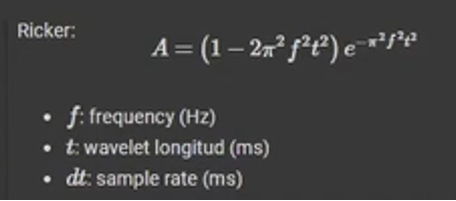

In [273]:
FREQ=25   # Hz
TN=0.5    # time longiture
DT=0.002  # sample rate


In [275]:
# Generate a time series  (min, max, step)
t=np.arange(-TN/2,TN/2,DT)
len(t)

250

In [278]:
# define the wavelet
ricker = (1-2*np.pi**2*FREQ**2*t**2)*(np.exp(-np.pi**2*FREQ**2*t**2))
len(ricker)

250

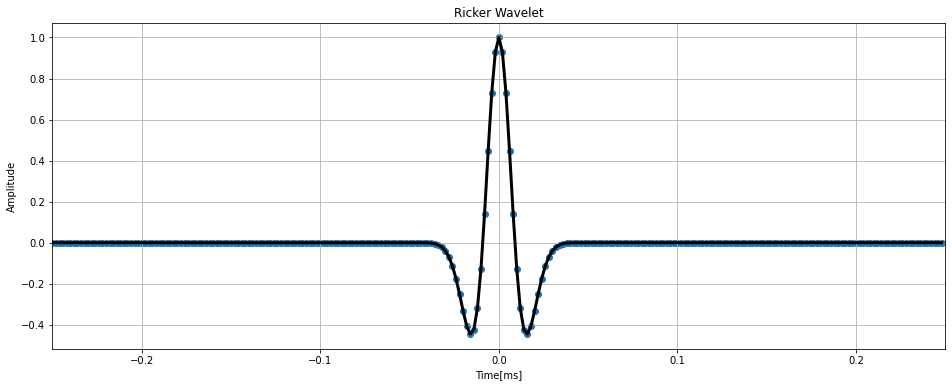

In [281]:
plt.figure(figsize=(16,6))
plt.plot(t,ricker, linewidth=3, c="black")
plt.scatter(t,ricker)
plt.title("Ricker Wavelet")
plt.ylabel("Amplitude")
plt.xlabel("Time[ms]")
plt.xlim(-0.25,0.25)
plt.grid()

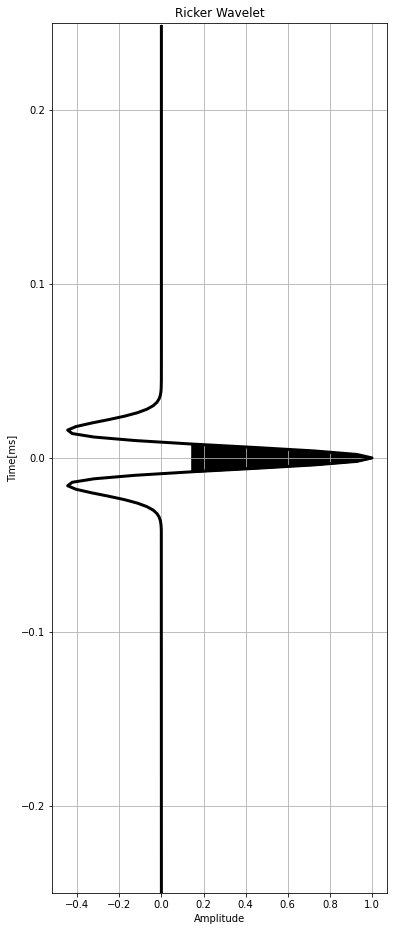

In [291]:
plt.figure(figsize=(6,16))
plt.plot(ricker, t, linewidth=3, c="black")
plt.fill_between(ricker,t,0,ricker>=0.0,color="black")
#plt.scatter(ricker,t)
plt.title("Ricker Wavelet")
plt.xlabel("Amplitude")
plt.ylabel("Time[ms]")
plt.ylim(-0.25,0.25)
plt.grid()